In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC

Data Preprocessing

In [8]:
data = pd.read_csv('parkinsons/parkinsons.csv')
X = data.drop(['name', 'status'], axis=1)
y = data['status'] #1 = with PD, 0 = Healthy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Training

In [12]:
svm_model = SVC(kernel='linear', C=1.0, probability=True)  #'probability=True' is needed for SHAP or other explanations
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Model Evaluation

In [14]:
y_pred_svm = svm_model.predict(X_test)

In [18]:
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm)) #print detailed performance metrics

SVM Classification Report
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



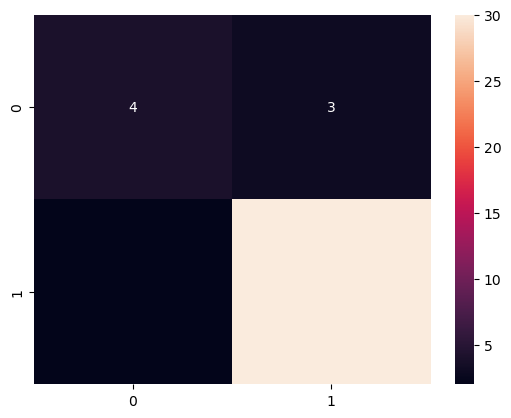

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True)
plt.show()